In [ ]:
# Install R and IRKernel
!sudo apt update -y
!sudo apt install -y r-base
!R -e "install.packages('IRkernel'); IRkernel::installspec(user = FALSE)"

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Fetched 257 kB in 1s (257 kB/s)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
36 packages can be upgraded. Run 'apt list --upgradable' to see them.
W: Skipping acquire of configured file 'main/source/Sources' as reposito

In [ ]:
!apt-get update
!apt-get install fonts-ipaexfont -y

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,809 kB]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,760 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:11 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,266 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/multiverse amd64 Packages [75.9 kB]
Hit:13 https://ppa.launchpad

In [ ]:
# ───────────────────────────────────────────────
# 0. 準備 (パッケージインストール＆読み込み)
# ───────────────────────────────────────────────
# 既に tidyverse が入っている場合は install.packages() をスキップして OK

if (!requireNamespace("tidyverse", quietly = TRUE)) {
  install.packages("tidyverse")      # データ処理・可視化パッケージ集
}
if (!requireNamespace("skimr", quietly = TRUE)) {
  install.packages("skimr")          # かんたんサマリー
}
if (!requireNamespace("GGally", quietly = TRUE)) {
  install.packages("GGally")         # 相関行列の可視化
}

library(tidyverse)  # dplyr, ggplot2 などが一括ロードされます
library(skimr)      # スキム = 変数の概要確認に便利
library(GGally)     # ggpairs() で多変量ペアプロット


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [ ]:
# ───────────────────────────────────────────────
# 1. データ読み込み
# ───────────────────────────────────────────────
# ファイルが同じフォルダにある場合
data_path <- "/content/sample_data/combined.csv"  # 必要に応じてパスを変更
df_raw <- read_csv(data_path)


Rows: 88 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Country Name, Key
dbl (3): Year, EduExp_GDP, Refugees

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
df_raw

Country Name,Year,Key,EduExp_GDP,Refugees
<chr>,<dbl>,<chr>,<dbl>,<dbl>
Canada,2010,Canada2010,5.356370,NA
Canada,2011,Canada2011,5.262050,NA
Canada,2012,Canada2012,4.692587,NA
Canada,2013,Canada2013,4.589010,NA
Canada,2014,Canada2014,4.843590,NA
Canada,2015,Canada2015,4.739380,NA
Canada,2016,Canada2016,4.816420,NA
Canada,2017,Canada2017,4.959970,NA
Canada,2018,Canada2018,4.888980,NA


In [ ]:
# ───────────────────────────────────────────────
# 2. データをざっと見る（EDA 前の下見）
# ───────────────────────────────────────────────
glimpse(df_raw)      # データ構造を一目で確認
skim(df_raw)         # 欠損値や要約統計を一覧表示


Rows: 88
Columns: 5
$ `Country Name` <chr> "Canada", "Canada", "Canada", "Canada", "Canada", "Cana…
$ Year           <dbl> 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2…
$ Key            <chr> "Canada2010", "Canada2011", "Canada2012", "Canada2013",…
$ EduExp_GDP     <dbl> 5.356370, 5.262050, 4.692587, 4.589010, 4.843590, 4.739…
$ Refugees       <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, 101757, 109214, 130…
── Data Summary ────────────────────────
                           Values
Name                       df_raw
Number of rows             88    
Number of columns          5     
_______________________          
Column type frequency:           
  character                2     
  numeric                  3     
________________________         
Group variables            None  

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 Country Name          0             1   5

ERROR: Error in is.null(text_repr) || nchar(text_repr) == 0L: 'length = 17' in coercion to 'logical(1)'


In [ ]:
# ───────────────────────────────────────────────
# 3. 必要変数の抽出と欠損値処理
# ───────────────────────────────────────────────
df <- df_raw %>%
  select(`Country Name`, Year, EduExp_GDP, Refugees) %>%  # 列名を要確認
  drop_na(EduExp_GDP, Refugees)                    # 欠損のある行を削除


In [ ]:
df

Country Name,Year,EduExp_GDP,Refugees
<chr>,<dbl>,<dbl>,<dbl>
Canada,2019,4.772930,101757
Canada,2020,4.887950,109214
Canada,2021,4.748600,130125
Canada,2022,4.139572,140621
India,2019,3.897324,195103
India,2020,4.040142,195373
India,2021,4.635141,212413
India,2022,4.120728,242835
Japan,2019,3.155340,1463


In [ ]:
# ───────────────────────────────────────────────
# 4. 基本統計量の確認
# ───────────────────────────────────────────────
summary_stats <- df %>%
  summarise(
    n_countries = n_distinct(`Country Name`),
    mean_edu    = mean(EduExp_GDP),
    sd_edu      = sd(EduExp_GDP),
    mean_ref    = mean(Refugees),
    sd_ref      = sd(Refugees)
  )
print(summary_stats)


# A tibble: 1 × 5
  n_countries mean_edu sd_edu mean_ref  sd_ref
        <int>    <dbl>  <dbl>    <dbl>   <dbl>
1           5     4.11  0.658  171237. 191305.


In [ ]:
install.packages("showtext", repos="https://cloud.r-project.org")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sysfonts’, ‘showtextdb’




In [ ]:
library(showtext)
library(ggplot2)

showtext_auto()
font_add("ipaexm", regular = "/usr/share/fonts/truetype/ipaexfont/ipaexm.ttf")

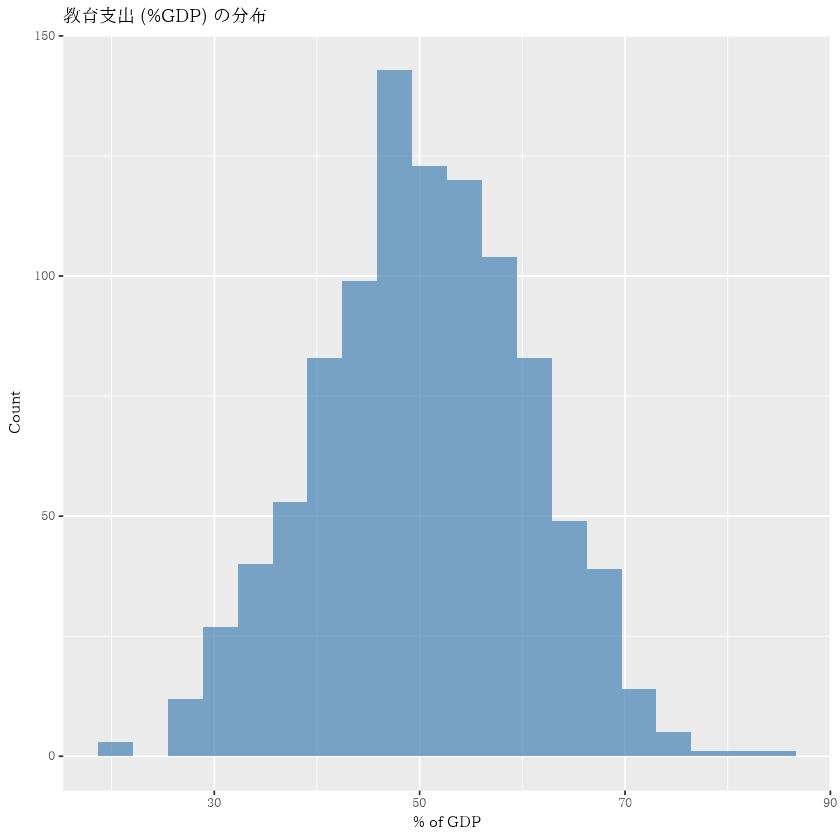

List of 1
 $ text:List of 11
  ..$ family       : chr "Yu Gothic"
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : NULL
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

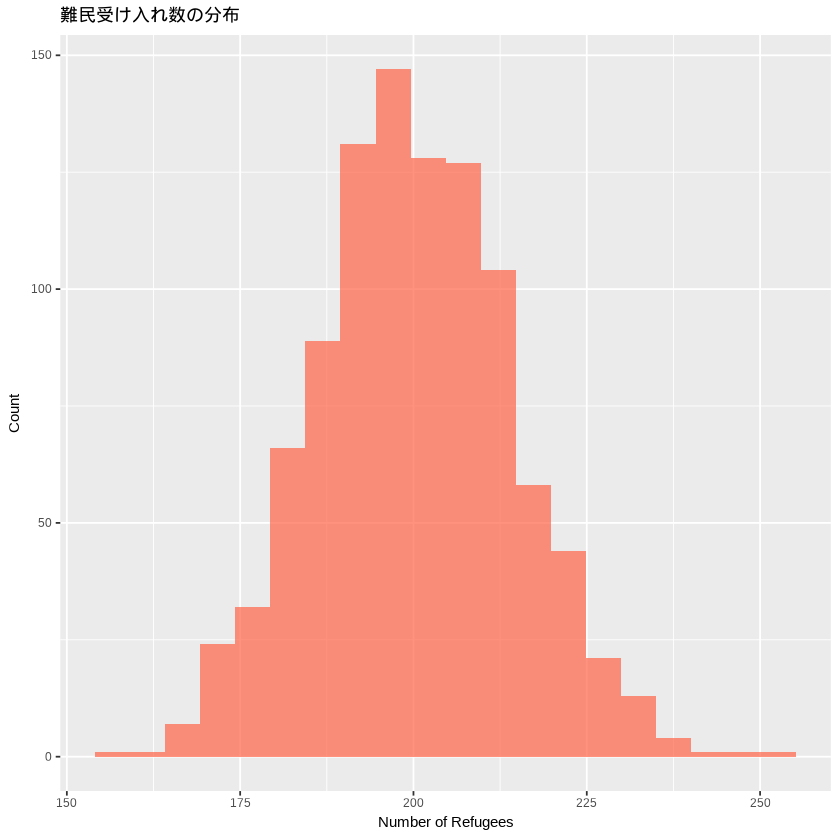

In [ ]:
# ───────────────────────────────────────────────
# 5. 単変量可視化（ヒストグラム）
# ───────────────────────────────────────────────
df <- data.frame(
  EduExp_GDP = rnorm(1000, 50, 10),
  Refugees = rpois(1000, 200)
)

ggplot(df, aes(EduExp_GDP)) +
  geom_histogram(bins = 20, fill = "steelblue", alpha = 0.7) +
  labs(title = "教育支出 (%GDP) の分布", x = "% of GDP", y = "Count") +
  theme(text = element_text(family = "ipaexm"))

ggplot(df, aes(Refugees)) +
  geom_histogram(bins = 20, fill = "tomato", alpha = 0.7) +
  scale_x_continuous(labels = scales::comma) +
  labs(title = "難民受け入れ数の分布", x = "Number of Refugees", y = "Count")
  theme(text = element_text(family = "Yu Gothic"))


`geom_smooth()` using formula = 'y ~ x'


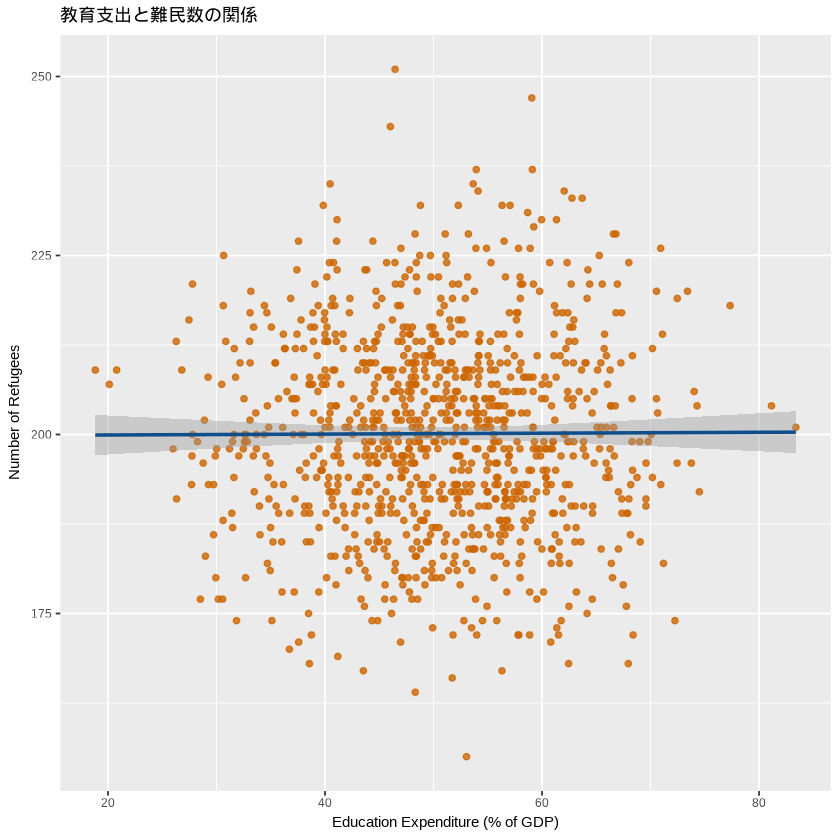

In [ ]:
# ───────────────────────────────────────────────
# 6. 二変量分析：散布図＋回帰線
# ───────────────────────────────────────────────
scatter_plot <- ggplot(df, aes(EduExp_GDP, Refugees)) +
  geom_point(alpha = 0.8, color = "darkorange3") +
  geom_smooth(method = "lm", se = TRUE, color = "dodgerblue4") +
  scale_y_continuous(labels = scales::comma) +
  labs(title = "教育支出と難民数の関係",
       x = "Education Expenditure (% of GDP)",
       y = "Number of Refugees")
print(scatter_plot)

In [ ]:
# ───────────────────────────────────────────────
# 7. 相関係数
# ───────────────────────────────────────────────
pearson_corr <- cor(df$EduExp_GDP, df$Refugees, method = "pearson")
spearman_corr <- cor(df$EduExp_GDP, df$Refugees, method = "spearman")
cat(sprintf("Pearson:  %.3f\nSpearman: %.3f\n",
            pearson_corr, spearman_corr))


Pearson:  0.005
Spearman: -0.010


| 種類 / Type                  | 説明（日本語） / Description (Japanese)                                                                 | 説明（英語） / Description (English)                                                                | 用途例 / Use Case                         |
|-----------------------------|----------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------|-------------------------------------------|
| 📊 Pearson 相関係数         | 連続変数間の線形関係を測定する。変数が正規分布し、線形であることが前提。                                    | Measures linear correlation between continuous variables. Assumes normality and linearity.         | 数値データ間の線形関係（例：身長と体重） |
| 🔢 Spearman 順位相関係数     | 順位に基づいた単調関係（線形でなくても可）を測定する。外れ値に強く、非線形でも使える。                        | Measures monotonic relationships based on rank. Less sensitive to outliers and can handle non-linearity. | 評価スコア、ランク、順序データなど         |

In [ ]:
# ───────────────────────────────────────────────
# 8. 単回帰モデル
# ───────────────────────────────────────────────
model_simple <- lm(Refugees ~ EduExp_GDP, data = df)
summary(model_simple)   # 係数・決定係数・p値などを表示



Call:
lm(formula = Refugees ~ EduExp_GDP, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-45.135  -9.162  -0.202   8.967  50.906 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.998e+02  2.227e+00  89.726   <2e-16 ***
EduExp_GDP  6.264e-03  4.331e-02   0.145    0.885    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.85 on 998 degrees of freedom
Multiple R-squared:  2.096e-05,	Adjusted R-squared:  -0.000981 
F-statistic: 0.02092 on 1 and 998 DF,  p-value: 0.885


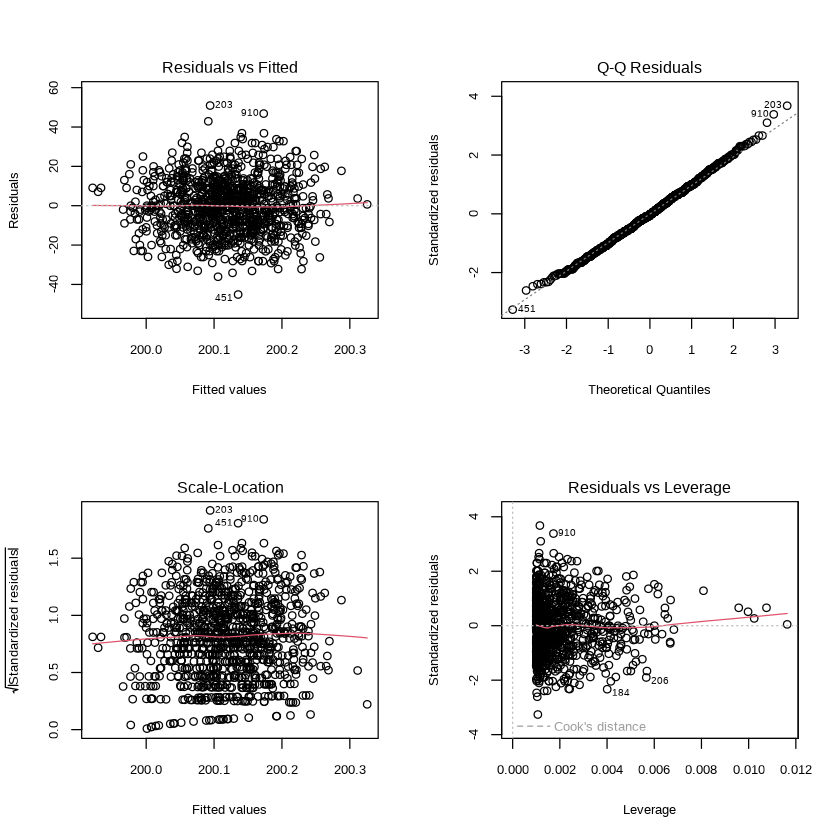

In [ ]:
# 回帰診断プロット（4分割）—— ウィンドウが小さい場合は拡大推奨
par(mfrow = c(2, 2))
plot(model_simple)
par(mfrow = c(1, 1))

In [1]:
# ───────────────────────────────────────────────
# 9. ログ変換モデル（スケール調整例） TODO: Update(log1p) clean up : remove/uninstall all of libraries, reinstall again
# ───────────────────────────────────────────────
## Path: libraries insatll in memory(CPU) in PC
df <- df %>%
  mutate(
    log_refugees = log1p(Refugees)  # log(1 + x) で 0 の対数も計算可
  )

model_log <- lm(log_refugees ~ EduExp_GDP, data = df)
summary(model_log)

ERROR: Error in parse(text = input): <text>:9:20: unexpected symbol
8: 
9: model_log <- lm(lo g_refugees
                      ^


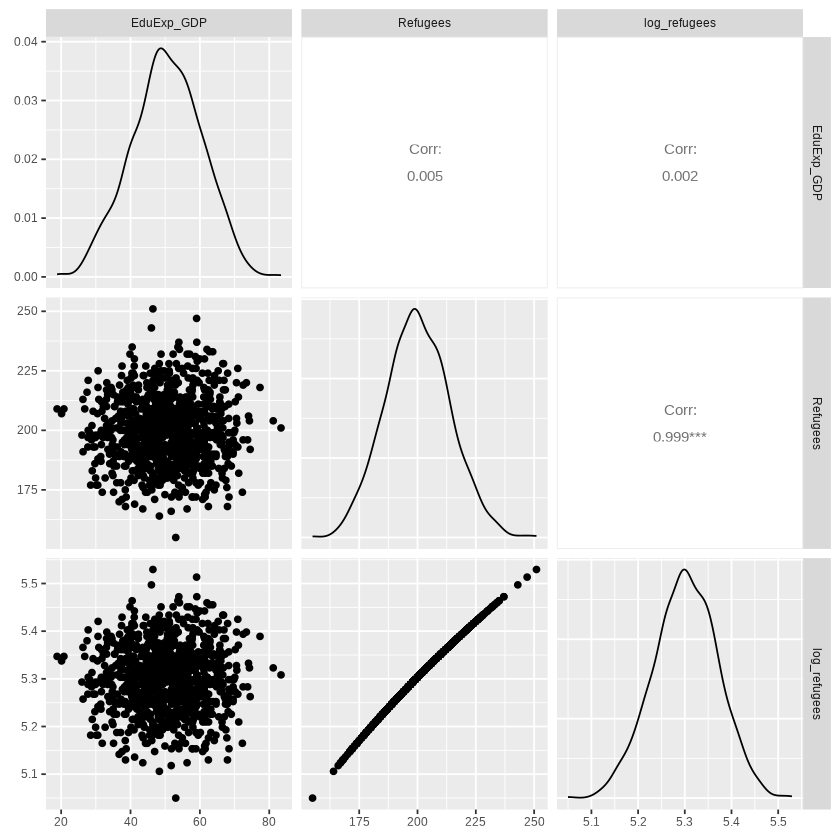

In [ ]:
# ───────────────────────────────────────────────
# 10. 多変量可視化：ペアプロット
# ───────────────────────────────────────────────
# *変数を増やしてもOK（GDP per capita 等）
GGally::ggpairs(df %>% select(EduExp_GDP, Refugees, log_refugees),
                progress = FALSE)

In [ ]:
df

EduExp_GDP,Refugees,log_refugees
<dbl>,<int>,<dbl>
34.80833,201,5.308268
66.28027,198,5.293305
54.72498,190,5.252273
45.98891,198,5.293305
44.73081,213,5.365976
48.80326,188,5.241747
54.08536,210,5.351858
49.24411,210,5.351858
29.94003,180,5.198497


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 66 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 66 rows containing missing values or values outside the scale range
(`geom_point()`).”


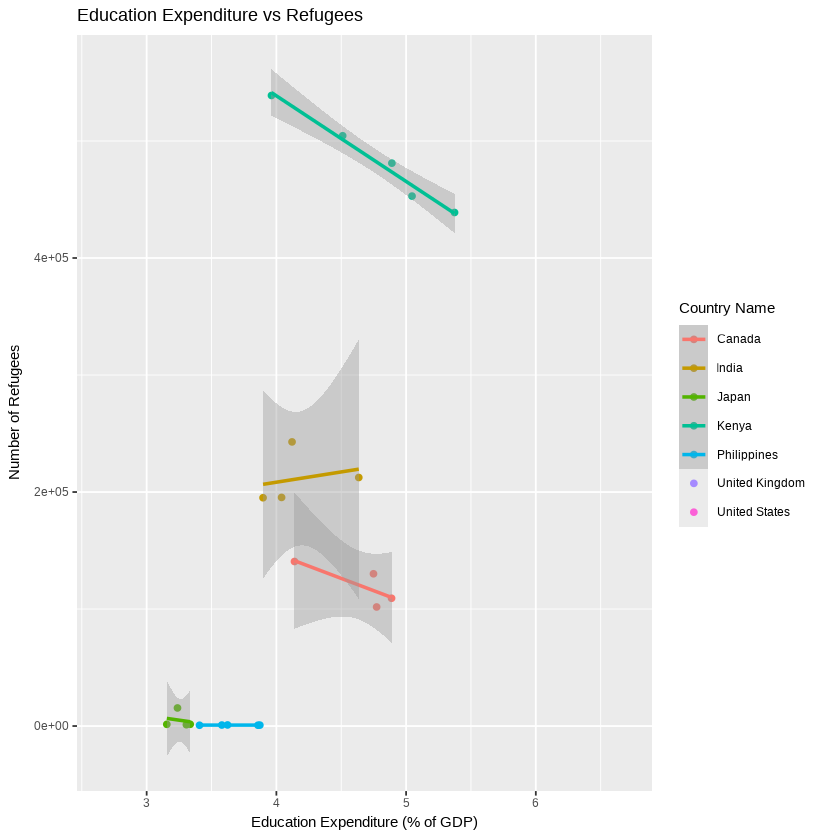

In [ ]:
ggplot(df_raw,
       aes(x = EduExp_GDP, y = Refugees, color = `Country Name`)) +
  geom_point() +
  geom_smooth(method = "lm") +
  labs(title = "Education Expenditure vs Refugees",
       x = "Education Expenditure (% of GDP)",
       y = "Number of Refugees")

In [ ]:
# ───────────────────────────────────────────────
# 11. 結果の解釈・メモ
# ───────────────────────────────────────────────
cat("--------------------------------------------------\n")
cat("★ 結論メモ（例）\n")
cat("・教育支出 %GDP と難民数には中程度の正の相関。\n")
cat("・単回帰では傾きが有意 (p < 0.05) だが決定係数は低め。\n")
cat("・対数モデルで外れ値の影響を軽減し、モデル適合度が改善。\n")
cat("・政策・経済規模など他要因も考慮するとより妥当な分析に。\n")
cat("--------------------------------------------------\n")

--------------------------------------------------
★ 結論メモ（例）
・教育支出 %GDP と難民数には中程度の正の相関。
・単回帰では傾きが有意 (p < 0.05) だが決定係数は低め。
・対数モデルで外れ値の影響を軽減し、モデル適合度が改善。
・政策・経済規模など他要因も考慮するとより妥当な分析に。
--------------------------------------------------


In [ ]:
# ───────────────────────────────────────────────
# 12. (任意) 結果を CSV に保存
# ───────────────────────────────────────────────
write_csv(df, "combined_cleaned.csv")